<a href="https://colab.research.google.com/github/radithal15/DE-Komdigi/blob/main/Data_Science_in_Telco_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latar Belakang**

DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

# **Data yang Digunakan**
Untuk dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')


Untuk detail datanya adalah sebagai berikut:

**UpdatedAt** Periode of Data taken

**customerID** Customer ID

**gender** Whether the customer is a male or a female (Male, Female)

**SeniorCitizen** Whether the customer is a senior citizen or not (1, 0)

**Partner** Whether the customer has a partner or not (Yes, No)

**Dependents** Whether the customer has dependents or not (Yes, No)

**tenure** Number of months the customer has stayed with the company

**PhoneService** Whether the customer has a phone service or not (Yes, No)

**MultipleLines** Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup** Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport** Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV** Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies** Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract** The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** The amount charged to the customer monthly

**TotalCharges** The total amount charged to the customer

**Churn** Whether the customer churned or not (Yes or No)

# **Library yang Digunakan**

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data.

**Pandas**

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

read_csv() digunakan untuk membaca file csv

str.match() digunakan untuk mencocokan dengan karakter tertentu

drop() digunakan untuk menghapus

count() digunakan untuk menghitung masing-masing variable

drop_duplicates() digunakan untuk menghapus data duplicate rows

fillna() digunakan untuk mengisi dengan nilai tertentu

quantile() digunakan untuk melihat quantile ke tertentu

mask() mengganti nilai tertentu jika kondisi memenuhi

astype() mengubah tipe data

value_counts() digunakan untuk menghitung unik dari kolom

sort_values() digunakan untuk sort values

isnull() digunakan untuk mendeteksi missing values

dropna() digunakan untuk menghapus missing values

replace() digunakan untuk mengganti nilai

**Matplotlib**

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

figure() digunakan untuk membuat figure gambar baru

**Seaborn**

Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

**box_plot()** digunakan untuk membuat box plot

Import Library dan Dataset

In [14]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Jumlah ID yang unik
print(df_load['customerID'].nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

Memfilter ID Number Pelanggan Format Tertentu

In [3]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


Memfilter Duplikasi ID Number Pelanggan

In [4]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# **Kesimpulan**

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

Mengatasi Missing Values dengan Penghapusan Rows

In [15]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (7070, 22)


Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [16]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Loop untuk mengisi missing values pada kolom numeric selain tenure
# Gunakan nama variabel median (bukan median_val, x, dll) agar sesuai instruksi dan bisa terbaca auto-grader
for col_name in list(['MonthlyCharges', 'TotalCharges']):
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
gender               0
UpdatedAt            0
customerID           0
Dependents           0
Partner              0
SeniorCitizen        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
InternetService      0
TechSupport          0
DeviceProtection     0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
Contract             0
PaymentMethod        0
Churn                0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMo

/tmp/ipython-input-2916017334.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
/tmp/ipython-input-2916017334.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Mendeteksi Adanya Outlier Menggunakan Boxplot


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


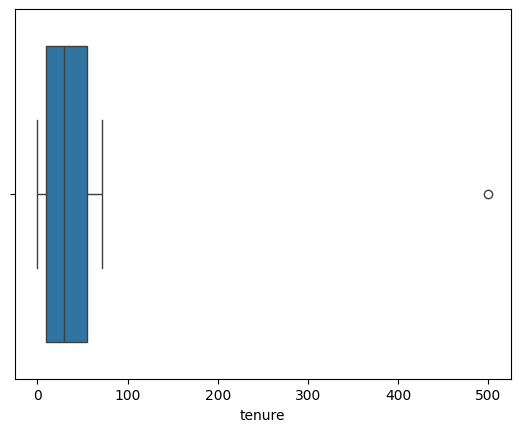

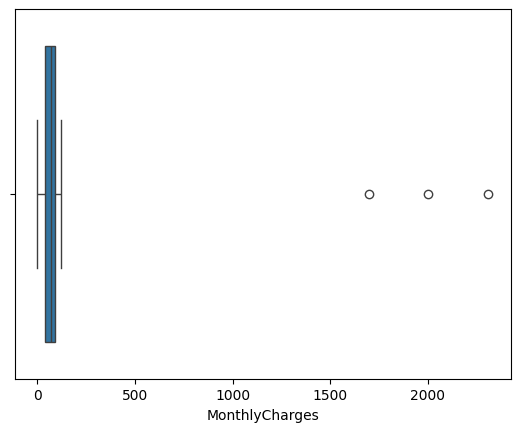

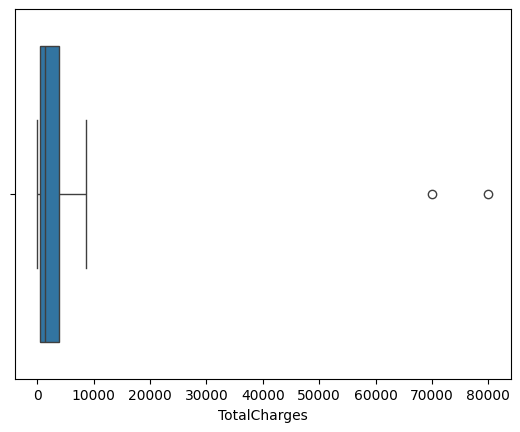

In [9]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

Mengatasi Outlier

In [18]:
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

# Apply outlier handling only to the specified columns
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask(df_load[['tenure','MonthlyCharges','TotalCharges']] > maximum, maximum, axis=1)
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask(df_load[['tenure','MonthlyCharges','TotalCharges']] < minimum, minimum, axis=1)


print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     170.45625
TotalCharges      8864.95000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -44.49375
TotalCharges     -4673.85000
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7070.000000     7070.000000   7070.000000
mean     32.376379       64.977649   2282.880764
std      24.573820       30.095452   2265.515374
min       0.000000        0.000000     19.000000
25%       9.000000       36.112500    403.200000
50%      29.000000       70.425000   1398.250000
75%      55.000000       89.850000   3787.900000
max     124.000000      170.456250   8864.950000


Mendeteksi Nilai yang tidak Standar

In [27]:
#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count Before Standardized Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
gender
Male         3559
Female       3491
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
SeniorCitizen
0    5922
1    1148
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Partner
Partner
No     3657
Yes    3413
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Dependents
Dependents
No     4951
Yes    2099
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
PhoneService
Yes    6386
No      684
Name: count, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
MultipleLines
No                  3404
Yes                 2982
No phone service     684
Name: count, dtype: int64

Unique Values Count Before Standardized Variable InternetService
InternetService
Fiber optic    3108
DSL            2429
No             1533
Name: count, dtyp

Menstandarisasi Variable Kategorik

In [29]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

#Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
																   print('\nUnique Values Count After Standardized Variable', col_name)
																   print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
gender
Male      3565
Female    3505
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents
Dependents
No     4951
Yes    2119
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn
Churn
No     5195
Yes    1875
Name: count, dtype: int64
